## **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

## 3. Interpolation and Blending

 Importing necessary libraries/modules and functions

In [1]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image

import cv2


Pretty printing has been turned OFF


### 3.1  Resizing an image size using different interpolation functions

** Q.1 Resize the `lena` or `vibot` image using nearest, bilinear and bicubic function.** 

You can define your function which accept the model and resize size from the user or just run a script.

In [2]:
#Define a function that accepts an image, a size to resize to (such as 20%
#or 0.2) to determine the size to resize to, and include the type of
#resize in quotations, whether bilinear, nearest, or bicubic.
def img_resize (image, resize_size, type_of_resize):
    image = misc.imresize(image, resize_size, interp = type_of_resize)
    return image;

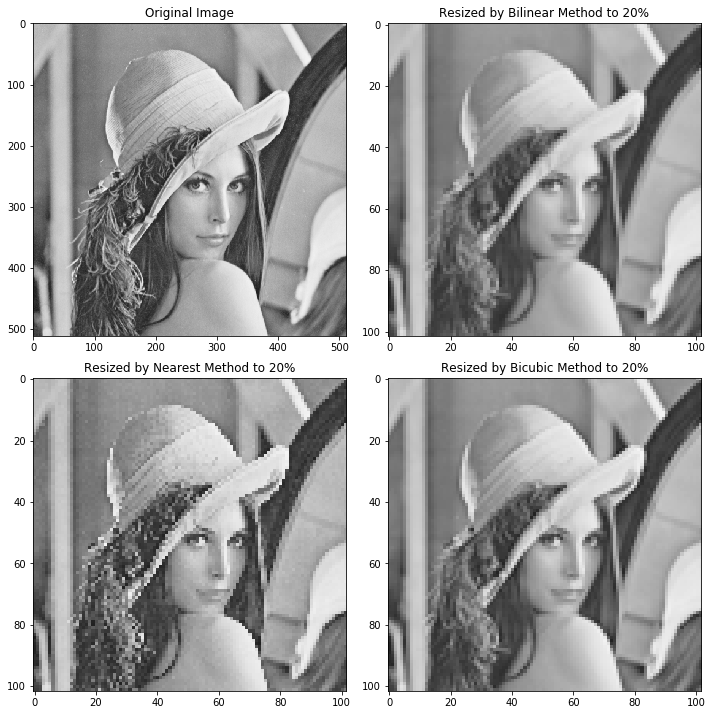

In [3]:
#Import the lena image to resize
img_path = './images/'
img_name = 'lena-grey.bmp'
lena_im = io.imread(img_path.__add__(img_name))

#Perform image required image resizing on the lena image
resized_lena_bilinear = img_resize(lena_im, 20, 'bilinear')
resized_lena_nearest = img_resize(lena_im, 20, 'nearest')
resized_lena_bicubic = img_resize(lena_im, 20, 'bicubic')

#Plot the images together to compare
fig = plt.figure(figsize=(10, 10))

plt.subplot(221)
io.imshow(lena_im, cmap = cm.Greys_r)
plt.title("Original Image")

plt.subplot(222)
io.imshow(resized_lena_bilinear, cmap = cm.Greys_r)
plt.title("Resized by Bilinear Method to 20%")

plt.subplot(223)
io.imshow(resized_lena_nearest, cmap = cm.Greys_r)
plt.title("Resized by Nearest Method to 20%")

plt.subplot(224)
io.imshow(resized_lena_bicubic, cmap = cm.Greys_r)
plt.title("Resized by Bicubic Method to 20%");

**Q.2 Write three functions that performs `simple_blend`, `alpha_blend` and `pyramid_blend`**

** Using your functions, blend `orange` and `apple` images together.**


In [4]:
def simple_blend (image1, image2):
    #Define a test to ensure images can be blended
    if (np.shape(image1) != np.shape(image2)):
        print("Image mismatch: images are different sizes")
        
    #Define the blended image shape and fill with zeroes
    #Define x, the splitting point of the blended image
    blended_image = np.zeros_like(image1)
    im1_height, im1_width = np.shape(image1)
    im2_height, im2_width = np.shape(image2)
    x = int(im1_width/2)
    
    #Fill the blended image with half image1 and half image2
    blended_image[:, :x] = image1[:, :x]
    blended_image[:, x:] = image2[:, x:]
    
    return(blended_image)

def alpha_blend (image1, image2):
    #Define a test to ensure images can be blended
    if (np.shape(image1) != np.shape(image2)):
        print("Image mismatch: images are different sizes")
    im1_height, im1_width = np.shape(image1)
    im2_height, im2_width = np.shape(image2)
    window = int(im1_height/5)
    blended_image = np.zeros(image1.shape)
    
    #Define the window size, a vector that spans its width, and an alpha function
    #that spans the width, allowing blending
    x1 = int(im1_width/2)-int(window/2)
    x2 = int(im1_width/2)+int(window/2)
    x = np.arange(x1,x2)
    alpha = x/(x1-x2) - x2/(x1-x2)
    
    #Fill the blended image outside the defined window with half image1 and half image2
    #and use the alpha function to fill inside the window
    blended_image[:, :x1] = image1[:, :x1]
    blended_image[:, x2:] = image2[:, x2:]
    blended_image[:,x] = alpha*image1[:,x] + (1-alpha)*image2[:,x]
   
    return(blended_image)

#Define a function called image pyramid which blends two images using
#the two images and the alpha blend function as a mask. First, build a 
#laplacian pyramid for each image. Then, blend the two pyramids and 
#collapse them to produce the final image.
def pyramid_blend (image1, image2):
    #Define a test to ensure images can be blended
    if (np.shape(image1) != np.shape(image2)):
        print("Image mismatch: images are different sizes")
    
    #Create a gaussian pyramid of 6 levels for image1 and image2,
    #saving the levels into arrays gp1 and gp2 (the pyramids)
    gaussian1 = image1.copy()
    gp1 = [gaussian1]
    for i in range(1,6):
        gaussian1 = cv2.pyrDown(gaussian1)
        gp1.append(gaussian1)
        
    gaussian2 = image2.copy()
    gp2 = [gaussian2]
    for i in range(1,6):
        gaussian2 = cv2.pyrDown(gaussian2)
        gp2.append(gaussian2)
        
    #Create a laplacian pyramid for image1 and image2 using the difference
    #between each level in the gaussian pyramid and the expanded version of
    #its lower level in the Gaussian pyramid
    laplacian1 = [gp1[5]]
    for i in range(5,0,-1):
        gp_level = gp1[i-1]
        GE = cv2.pyrUp(gp1[i])
        if np.shape(GE[0]) > np.shape(gp_level[0]):
            GE = np.delete(GE,-1,axis=0)
        if np.shape(GE[1]) > np.shape(gp_level[1]):
            GE = np.delete(GE,-1,axis=1)
        L = gp_level - GE
        laplacian1.append(L)
        
    laplacian2 = [gp2[5]]
    for i in range(5,0,-1):
        gp_level = gp2[i-1]
        GE = cv2.pyrUp(gp2[i])
        if np.shape(GE[0]) > np.shape(gp_level[0]):
            GE = np.delete(GE,-1,axis=0)
        if np.shape(GE[1]) > np.shape(gp_level[1]):
            GE = np.delete(GE,-1,axis=1)
        L = gp_level - GE
        laplacian2.append(L)
    

    #Combine the right and left halves of the images in each level
    #using the alpha blend function. This acts as the mask
    blended_pyramid = []
    for i in range (0,6):
        blended_level = alpha_blend(laplacian1[i],laplacian2[i])
        blended_pyramid.append(blended_level)

    #Collapse the pyramid by adding the level in the combined laplacian 
    #pyramid and the collapsed version of its upper level 
    blended_image = blended_pyramid[0]
    for i in range(1,6):
        blended_image = cv2.pyrUp(blended_image)
        upper_level = blended_pyramid[i]
        if np.shape(blended_image[0]) > np.shape(upper_level[0]):
            blended_image = np.delete(blended_image,-1,axis=0)
        if np.shape(blended_image[1]) > np.shape(upper_level[1]):
            blended_image = np.delete(blended_image,-1,axis=1)
        blended_image = blended_image + upper_level
    
    #Return the blended image so it can be displayed
    return(blended_image)

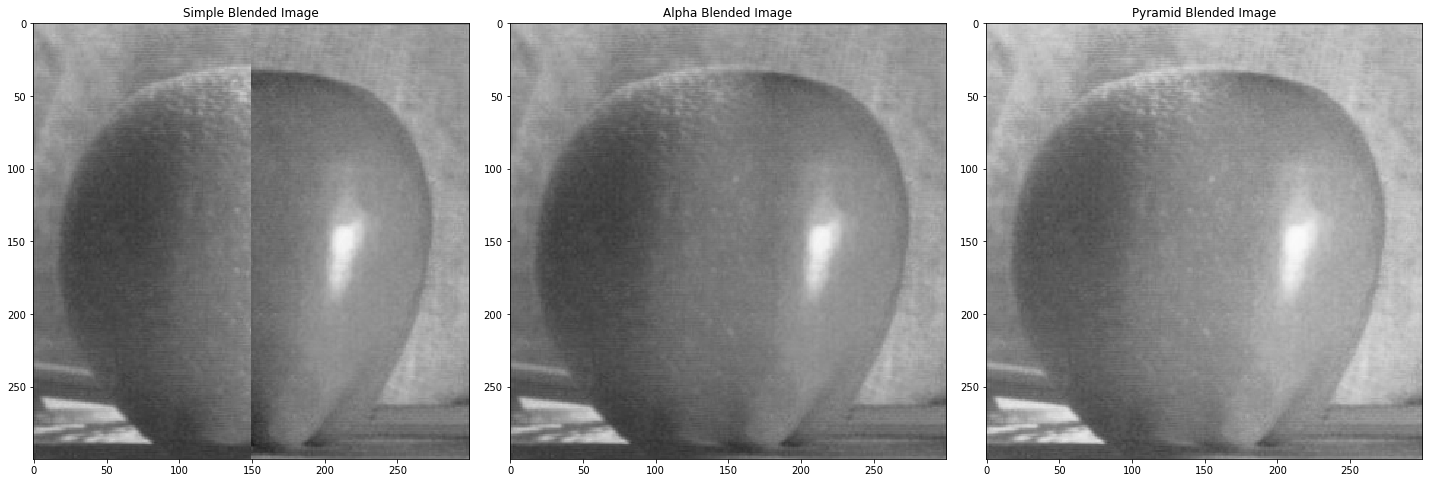

In [5]:
#Import the apple and orange images
img_name = 'orange.jpeg'
orange = io.imread(img_path.__add__(img_name),as_grey = True)
img_name = 'apple.jpeg'
apple = io.imread(img_path.__add__(img_name),as_grey = True)

#Perform the required blending of the images using the function defined above
simple_orpple = simple_blend(orange,apple)
alpha_orpple = alpha_blend(orange, apple)
pyramid_orpple = pyramid_blend(orange,apple)


#Plot the images together to compare
fig = plt.figure(figsize=(20, 20))

plt.subplot(131)
io.imshow(simple_orpple)
plt.title("Simple Blended Image")

plt.subplot(132)
io.imshow(alpha_orpple)
plt.title("Alpha Blended Image")

plt.subplot(133)
io.imshow(pyramid_orpple, cmap = cm.Greys_r)
plt.title("Pyramid Blended Image");
